In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(centers=3, random_state=42)

In [5]:
import seaborn as sns

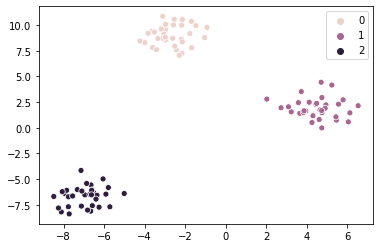

In [6]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

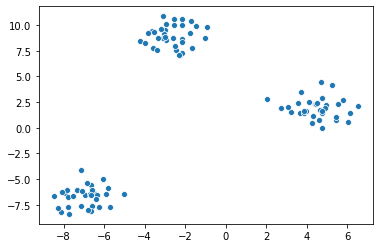

In [7]:
sns.scatterplot(X[:, 0], X[:, 1])

In [8]:
from sklearn.cluster import KMeans

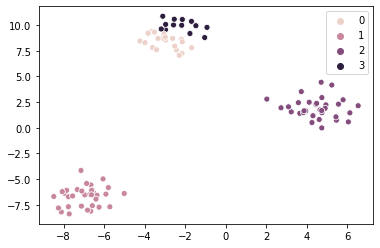

In [15]:
model = KMeans(n_clusters=4)

model.fit(X)

y_gen = model.labels_

sns.scatterplot(X[:, 0], X[:, 1], hue=y_gen)

In [16]:
model.cluster_centers_

array([[-2.95660471,  8.30877152],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.20127958,  9.94858935]])

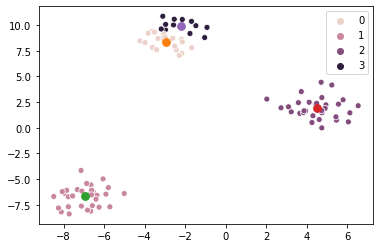

In [17]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y_gen)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=60)

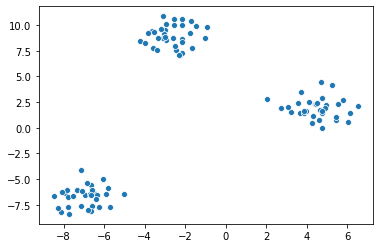

In [19]:
sns.scatterplot(X[:, 0], X[:, 1])

In [20]:
import random

In [21]:
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))
        

class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
        
        
        for i in range(self.max_iters):
            
            labels = []
        
            # going for each point
            for point in X:

                # collecting disctances form every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        
            
        
        

In [22]:
model = CustomKMeans(n_clusters=2)

model.fit(X)

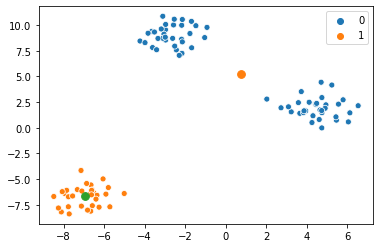

In [24]:
sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s=60)